# Big-O notation

The difference between the linear and binary search shows two fundamentally different complexity classes, or ways of relating the amount of time it takes to solve a problem based on the size of the problem space. Computer scientists refer to these with a notation called "Big O" notation that gives you an idea of how fast an algorithm is. 

The `linear_search` function was a $O(N)$ problem because in the worst case it takes the whole length of the input to solve a problem. The `binary_search` function was a $O(log~N)$ problem because in the worst case it takes the logarithm of the size of the input to solve a problem.

There are [many, many, many different complexity classes](https://complexityzoo.uwaterloo.ca/Complexity_Zoo) based on the context of a problem and the specifics of an algorithm. Researching these kinds of complexity classes is a large and active sub-discipline within computer science!

However, there are a few basic classes to keep in mind for our purposes. While designing an algorithm to be O(N) like the linear search may seem like a really bad choice now, it's actually the second-best case of performance we can hope for in many case. In other words, we're going to be dealing with algorithms that have much, much, much worse performance than our `linear_search` function ... and there's often nothing we can do about it!

* $O(1)$ - A **constant time** algorithm is somewhat unsual in that its performance is always the same, regardless of the size of the input.
* $O(log~N)$ - A **logarithmic time** algorithm is one of the best cases of performance we can hope for, but relatively rare!
* $O(N)$ - A **linear time** algorthm seems slow in comparison to logarithmic time, but is super speedy compared to some other complexity classes.
* $O(N~log~N)$ - A **log-linear time** algorithm that's slower than linear time, but will be our best case for some kinds of problems.
* $O(N^2)$ - A **polynomial time** ($N^2, N^3, ...$) algorithm is really slow compared to the alternatives above, but is often easy to write and understand.
* $O(2^N)$ - An **exponential time** algorithm that behaves totally differently from the polynomial time algorithms, often found in network analysis.
* $O(N!)$ - A **factorial time** algorithm is a worst case: anything you can do to out of this complexity class into another will result in massive speed-ups!

There are some problems, like the [Traveling Salesman Problem](https://en.wikipedia.org/wiki/Travelling_salesman_problem), where the worst-case scenario is stuck in non-polynomial time $O(N!)$ or $O(2^N)$ and even the cleverest computer scientists believe — but haven't proven! — there are no possible tricks left to speed the worst case up from non-polynomial time to something in polynomial time like $O(N^2)$. If you [can prove otherwise](https://en.wikipedia.org/wiki/P_versus_NP_problem), you'll become one of the most famous scientists in history.

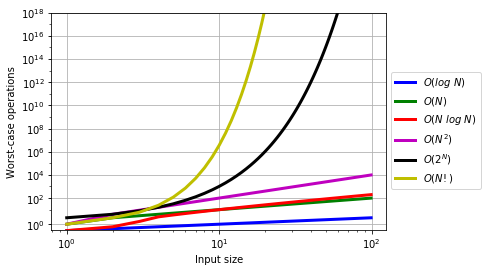

In [99]:
# Import matplotlib's pyplot and make it play nicely with Jupyter
import matplotlib.pyplot as plt
% matplotlib inline

# We're going to import numpy to help out with the calculations
import numpy as np

# And use scipy's own factorial method
from scipy.special import factorial

# Define some basic functions we'll use throughout
def constantN(x,a=1,b=0):
    return a

def logN(x,a=1,b=0):
    return a*np.log10(x)+b

def linearN(x,a=1,b=0):
    return a*x+b

def NlogN(x,a=1,b=0):
    return a*x*np.log10(x)+b

def N2(x,a=1,b=0):
    return a*x**2+b

def twoN(x,a=1,b=0):
    return a*2**x+b

def factN(x,a=1,b=0):
    return a*factorial(x)+b

# Generate different Y values according to each function for the same input X
x = range(1,100)
y_logN = [logN(num) for num in x]
y_N = [linearN(num) for num in x]
y_NlogN = [NlogN(num) for num in x]
y_N2 = [N2(num) for num in x]
y_2N = [twoN(num) for num in x]
y_Nfact = [factN(num) for num in x]

# Setup the empty plot
f,ax = plt.subplots(1,1,sharex=True)
ax.set_xscale('log')
ax.set_yscale('symlog')
ax.set_xlabel('Input size')
ax.set_ylabel('Worst-case operations')
ax.set_ylim((1e-1,1e18))
ax.set_yticks(np.logspace(0,18,10))
ax.grid(True)

# Plot all the complexity classes
ax.plot(x,y_logN,color='b',label='$O(log\ N$)',lw=3)
ax.plot(x,y_N,color='g',label='$O(N)$',lw=3)
ax.plot(x,y_NlogN,color='r',label='$O(N\ log\ N)$',lw=3)
ax.plot(x,y_N2,color='m',label='$O(N^2)$',lw=3)
ax.plot(x,y_2N,color='k',label='$O(2^N)$',lw=3)
ax.plot(x,y_Nfact,color='y',label='$O(N!)$',lw=3)

ax.legend(loc='upper left',bbox_to_anchor=(1,.75))

So $O(N!)$ behavior is *pretty* terrible and $O(2^N)$ isn't much better: these are *non-polynomial time* (NP) classes. Let's drop them and see what's left over a bit wider scale of input sizes: these are *polynomial time* (P) classes. $O(log~N)$ still looks righteous compared to $O(N)$ which looks a lot better than $O(N^2)$.

# Analysis of algorithms

Different kinds of design patterns have different impacts on the performance of your code. Here are some very basic heuristics for how a design pattern influences performance.

Make `performance_tester` and `curve_fitting` functions to abstract the code we had above.

In [85]:
def performance_tester(stmt_str,setup_format_str,input_range,number=1000):
    # Create a dictionary to store the performance numbers values for different inputs ranges as key
    performance_dict = {}

    # For each of input_range in input_ranges
    for ir in input_range:
        seconds = timeit.timeit(stmt=stmt_str,
                                setup=setup_format_str.format(ir), # Put the input range into the setup
                                number=number,
                                globals=globals())

        # Record the performance in the dictionary
        performance_dict[ir] = seconds

    return performance_dict

def curve_fitting(performance_dict,function):
    # Actual performance
    _actual_x = sorted(performance_dict.keys())
    _actual_y = sorted(performance_dict.values())

    # Perform curve-fitting keeping bounds of parameter estimates positive
    params,covariance = curve_fit(function,_actual_x,_actual_y,bounds=[0,[np.inf,np.inf]])

    # Use the curve-fitting parameters to generate theoretical predictions if linear
    theoretical_y = [function(num,params[0],params[1]) for num in _actual_x]
    
    return _actual_x, _actual_y, _actual_x, theoretical_y

### Accessing a position in a list or a dictionary works in $O(1)$ time

In [212]:
def first(_range):
    return _range[0]

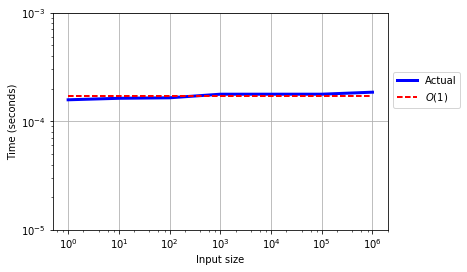

In [213]:
first_performance = performance_tester('first(test_data)','test_data = np.arange({0})',np.logspace(0,6,7))
first_actual_x, first_actual_y, first_theo_x, first_theo_y = curve_fitting(first_performance,constantN)

# Setup the empty plot
f,ax = plt.subplots(1,1,sharex=True)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Input size')
ax.set_ylabel('Time (seconds)')
ax.set_ylim((1e-5,1e-3))
ax.grid(True)

ax.plot(first_actual_x,first_actual_y,color='b',lw=3,label='Actual')
ax.plot(first_theo_x,first_theo_y,color='r',lw=2,ls='--',label='$O(1)$')

ax.legend(loc='upper left',bbox_to_anchor=(1,.75))

### Halving the solution space works in $O(log\ N)$ time

In [140]:
def halver(_range):
    while len(_range) > 1:
        _halfway = len(_range)//2
        _range = _range[:_halfway]
    return list(_range)

halver(range(10))

[0]

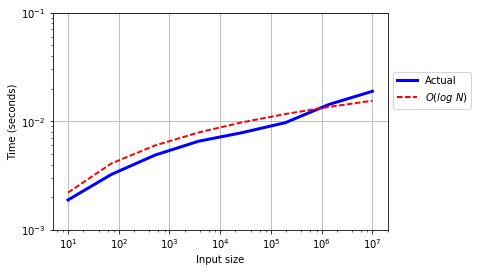

In [176]:
halver_performance = performance_tester('halver(test_data)','test_data = range(int({0}))',np.logspace(1,7,8))
halver_actual_x, halver_actual_y, halver_theo_x, halver_theo_y = curve_fitting(halver_performance,logN)

# Setup the empty plot
f,ax = plt.subplots(1,1,sharex=True)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Input size')
ax.set_ylabel('Time (seconds)')
ax.set_ylim((1e-3,1e-1))
ax.grid(True)

ax.plot(halver_actual_x,halver_actual_y,color='b',lw=3,label='Actual')
ax.plot(halver_theo_x,halver_theo_y,color='r',lw=2,ls='--',label='$O(log\ N)$')

ax.legend(loc='upper left',bbox_to_anchor=(1,.75))

### A single `for ` or `while` loop works in $O(N)$ time

In [142]:
def adder(_range):
    added_list = list()
    for point in _range:
        added_list.append(point + 1)
    return added_list

adder(list(range(1,11)))

[2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

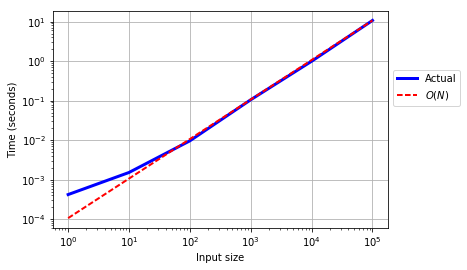

In [143]:
adder_performance = performance_tester('adder(test_data)','test_data = range({0})',[1,10,100,1000,10000,100000,100000])
adder_actual_x, adder_actual_y, adder_theo_x, adder_theo_y = curve_fitting(adder_performance,linearN)

# Setup the empty plot
f,ax = plt.subplots(1,1,sharex=True)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Input size')
ax.set_ylabel('Time (seconds)')
ax.grid(True)

ax.plot(adder_actual_x,adder_actual_y,color='b',lw=3,label='Actual')
ax.plot(adder_theo_x,adder_theo_y,color='r',lw=2,ls='--',label='$O(N)$')

ax.legend(loc='upper left',bbox_to_anchor=(1,.75))

### Many sorting algorithms work in $O(N\ log\ N)$ time

In [14]:
# http://stackoverflow.com/a/18783542/1574687
def mergesort(x):
    result = []
    if len(x) < 20:
        return sorted(x)
    mid = int(len(x) / 2)
    y = mergesort(x[:mid])
    z = mergesort(x[mid:])
    i = 0
    j = 0
    while i < len(y) and j < len(z):
        if y[i] > z[j]:
            result.append(z[j])
            j += 1
        else:
            result.append(y[i])
            i += 1
    result += y[i:]
    result += z[j:]
    return result

mergesort(list('heart'))

['a', 'e', 'h', 'r', 't']

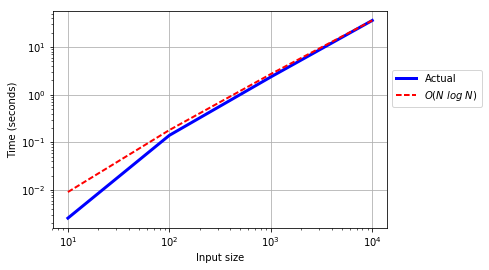

In [153]:
def random_array(size):
    return np.random.choice(range(size),size,replace=False)

mergesort_performance = performance_tester('mergesort(test_data)','test_data = random_array({0})',[10,100,1000,10000])
mergesort_actual_x, mergesort_actual_y, mergesort_theo_x, mergesort_theo_y = curve_fitting(mergesort_performance,NlogN)

# Setup the empty plot
f,ax = plt.subplots(1,1,sharex=True)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Input size')
ax.set_ylabel('Time (seconds)')
ax.grid(True)

ax.plot(mergesort_actual_x,mergesort_actual_y,color='b',lw=3,label='Actual')
ax.plot(mergesort_theo_x,mergesort_theo_y,color='r',lw=2,ls='--',label='$O(N\ log\ N)$')

ax.legend(loc='upper left',bbox_to_anchor=(1,.75))

### A loop within a loop works in $O(N)*O(N) = O(N^2)$ time

In [164]:
def doubleloop(_range):
    total = 0
    for num1 in _range:
        for num2 in _range:
            total += num1+num2
    return total

doubleloop(range(10))

900

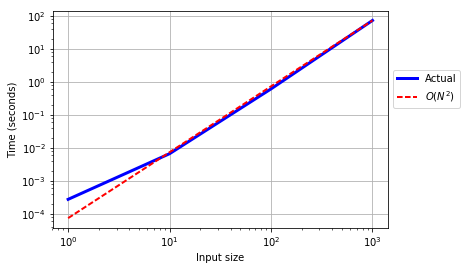

In [166]:
doubleloop_performance = performance_tester('doubleloop(test_data)','test_data = range({0})',[1,10,100,1000])
doubleloop_actual_x, doubleloop_actual_y, doubleloop_theo_x, doubleloop_theo_y = curve_fitting(doubleloop_performance,N2)

# Setup the empty plot
f,ax = plt.subplots(1,1,sharex=True)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Input size')
ax.set_ylabel('Time (seconds)')
ax.grid(True)

ax.plot(doubleloop_actual_x,doubleloop_actual_y,color='b',lw=3,label='Actual')
ax.plot(doubleloop_theo_x,doubleloop_theo_y,color='r',lw=2,ls='--',label='$O(N^2)$')

ax.legend(loc='upper left',bbox_to_anchor=(1,.75))

### Recursive functions often work in $O(2^N)$ time

In [178]:
def fibonacci(num):
    if num <= 1:
        return num
    else:
        return fibonacci(num-2) + fibonacci(num - 1)

fibonacci(10)

55

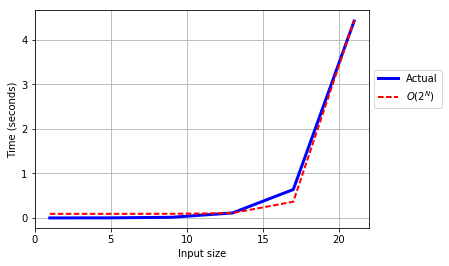

In [211]:
fib_performance = performance_tester('fibonacci(test_data)','test_data = {0}',range(1,22,4))
fib_actual_x, fib_actual_y, fib_theo_x, fib_theo_y = curve_fitting(fib_performance,twoN)

# Setup the empty plot
f,ax = plt.subplots(1,1,sharex=True)
#ax.set_xscale('log')
#ax.set_yscale('log')
ax.set_xlabel('Input size')
ax.set_ylabel('Time (seconds)')
ax.set_xticks(range(0,26,5))
ax.grid(True)

ax.plot(fib_actual_x,fib_actual_y,color='b',lw=3,label='Actual')
ax.plot(fib_theo_x,fib_theo_y,color='r',lw=2,ls='--',label='$O(2^N)$')

ax.legend(loc='upper left',bbox_to_anchor=(1,.75))

### Brute-force or permutation functions work in $O(N!)$ time

In [191]:
# We'll use an already-existing tool to generate permutations
from itertools import permutations

def perms(_range):
    return len(list(permutations(_range)))

perms(range(4))

24

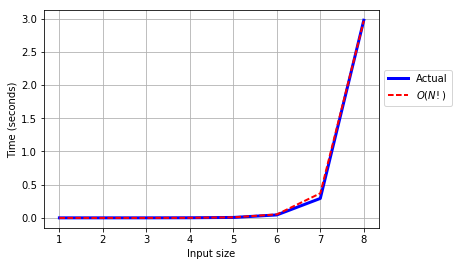

In [214]:
perms_performance = performance_tester('perms(test_data)','test_data = range({0})',range(1,9))
perms_actual_x, perms_actual_y, perms_theo_x, perms_theo_y = curve_fitting(perms_performance,factN)

# Setup the empty plot
f,ax = plt.subplots(1,1,sharex=True)
#ax.set_xscale('log')
#ax.set_yscale('log')
ax.set_xlabel('Input size')
ax.set_ylabel('Time (seconds)')
ax.grid(True)

ax.plot(perms_actual_x,perms_actual_y,color='b',lw=3,label='Actual')
ax.plot(perms_theo_x,perms_theo_y,color='r',lw=2,ls='--',label='$O(N!)$')

ax.legend(loc='upper left',bbox_to_anchor=(1,.75))

# Asymptotic analysis

Adapted from [Goodrich, Tamassia, & Goldwasser (2013) Ch. 3](https://learn.colorado.edu/d2l/le/content/190526/viewContent/2876341/View) and [MIller & Ranum (2013) Ch. 2](https://learn.colorado.edu/d2l/le/content/190526/viewContent/2876344/View).

Asymptotic analysis, also known as [analysis of algorithms](https://en.wikipedia.org/wiki/Analysis_of_algorithms) is fancy name for translating written code into the Big O notation above. As we saw above some complexity classes completely dominate the performance of others. If your code is mostly linear time, but there's a part that's factorial-time, then you have a bottleneck and everything is going to wait on the factorial-time part to finish. The general idea is to identify the least efficient parts of your code.

Take the example function, `find_max`, below:

* The `biggest = data[0]` is done in constant time (it doesn't matter how big the data list is, taking the first element out should always take the same amount of time): $O(1)$
* The loop `for val in data` iterates through the entire list of data points, meaning the number of operations it needs to take is proportional to the size of the input: $O(N)$
* The `if val > biggest` comparison is comparing two value, so this is also constant time: $O(1)$
* The `biggest = val` reassignment is also constant time: $O(1)$

If we add up $O(1) + O(N) + O(1) + O(1)$, the dominant term is $O(N)$ caused by the loop.

In [2]:
def find_max(data):
    biggest = data[0]
    for val in data:
        if val > biggest:
            biggest = val
    return biggest

Check to make sure it works.

In [3]:
range_size_10 = list(range(10))
range_size_10

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [4]:
find_max(range_size_10)

9

Let's plot its performance of strings of different lengths. We're going to use the [timeit](https://docs.python.org/3.5/library/timeit.html) library to measure the performance of our code.

Take this example below where we want to see how long it takes the function above to work with an input of range(10000). The `timeit` method in the timeit library (hence timeit.timeit) takes a stmt as a string, a setup also as a sting, the number of runs to do to get an estimate, and whether to use variables and functions from the global namespace. The output is the average average time in seconds to execute the code.

We can use the `find_max` function converted to a string with "test_data" as the input variable as the stmt, define a temporary test_data variable for the setup, and then run the code 1000 times. It takes 0.040ish seconds per loop on average on my computer.

In [5]:
# Import timeit library to measure performance
import timeit

timeit.timeit(stmt='find_max(test_data)', # Enter the function to be evaluated as a string
              setup='test_data = range(1000)', # Enter the input data to be evaluated as a string
              number=1000, # The number of executions to get an estimate of runtime
              globals=globals()) # Use functions, variables, etc. from the global notebook namespace

0.1020316299982369

Let's create a loop that passes setup ranges of different sizes to see how the algorithm's performance changes with input size.

In [44]:
input_ranges = [1,10,100,1000,10000,100000]

# Create a dictionary to store the performance numbers values for different inputs ranges as key
performance_dict = {}

# For each of input_range in input_ranges
for ir in input_ranges:
    seconds = timeit.timeit(stmt='find_max(test_data)',
                            setup='test_data = range({0})'.format(ir), # Put the input range into the setup
                            number=1000,
                            globals=globals())
    
    # Record the performance in the dictionary
    performance_dict[ir] = seconds

performance_dict

{1: 0.00030963799508754164,
 10: 0.0006171760032884777,
 100: 0.003986851996160112,
 1000: 0.056959145003929734,
 10000: 0.46573478600475937,
 100000: 4.68052048899699}

Plot it. We can see that for very small input sizes, the actual performance is worse than predicted but this is because the for loop's time to execute is small compared to the time it takes to complete other operations. But for larger input ranges, the growth clearly becomes linear with input size as the loop becomes the bottleneck in the algorithm's performance, closely matching our prediction that this function is in the $O(N)$ complexity class.

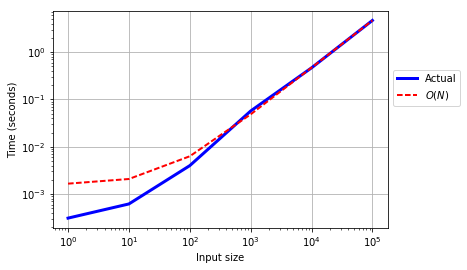

In [210]:
# Actual performance
actual_x = sorted(performance_dict.keys())
actual_y = sorted(performance_dict.values())

# Perform curve-fitting
from scipy.optimize import curve_fit
params,covariance = curve_fit(linearN,actual_x,actual_y,bounds=[0,[np.inf,np.inf]])

# Theoretical predictions if O(N)
theoretical_x = [1,10,100,1000,10000,100000]

# Use the curve-fitting parameters to generate theoretical predictions if linear
theoretical_y = [linearN(num,params[0],params[1]) for num in theoretical_x]

# Setup the empty plot
f,ax = plt.subplots(1,1,sharex=True)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Input size')
ax.set_ylabel('Time (seconds)')
ax.grid(True)

ax.plot(actual_x,actual_y,color='b',lw=3,label='Actual')
ax.plot(theoretical_x,theoretical_y,color='r',lw=2,ls='--',label='$O(N)$')

ax.legend(loc='upper left',bbox_to_anchor=(1,.75))

# Comparing anagram solutions

One string is an anagram of another if the second is a rearrangement of the first. For example "heart" and "earth" are anagrams. What are different solutions to trying to checking if two strings (assumed to be of equal length) are anagams?

First, we begin with the Checking Off approach. Loop through all the characters in the first string and loop through all the characters in the second string, we check if the letter from string 1 is also a letter in string 2 and if it is, add the letter from string 2 to the "matching_letters" list, and finally check if the length of the matching string letters is the same length as the length of string 1.

### Example of $O(N^2)$ solution

In [8]:
def anagram1(s1,s2):
    # Convert s2 into a list to do item assignment
    a_list = list(s2)
    # Start the loop at position 0 in s1
    pos_s1 = 0
    # Assume it's an anagram until you find that it isn't
    is_anagram1 = True
    
    # Loop over each letter in s1 as long as we still think it's an anagram
    while pos_s1 < len(s1) and is_anagram1:
        # Start the next loop at position 0 in s2
        pos_s2 = 0
        # Assume we haven't seen an anagram until we know we have
        is_anagram2 = False
        
        # Start another loop over each letter in s2 as long as we still think it's an anagram
        while pos_s2 < len(a_list) and not is_anagram2:
            # Finally do the comparison to check if the letter from s1 is also a letter in s2
            if s1[pos_s1] == a_list[pos_s2]:
                # If it's not, we don't have an anagram
                is_anagram2 = True
            else:
                # Otherwise go to the next letter in s2 in the loop
                pos_s2 += 1
        
        # If we've gone through the entire s2 comparing to the the letter in s1
        # And we haven't disproved it being an anagram so far, 
        if is_anagram2:
            # "check" the letter off so we don't double count
            a_list[pos_s2] = None
        else:
             # Otherwise pass the false is_anagram2 up to the first loop and tell it to stop too
            is_anagram1 = False
            
        
        # Continue on to the next letter in s1
        pos_s1 += 1
    
    # If we've gone through every letter in s1 and compared it against s2 
    # and there's still no evidence it's not an anagram, it's an anagram
    
    return is_anagram1

In [9]:
# Test to make sure it works
print(anagram1('heart','earth'))
print(anagram1('boat','rock'))
print(anagram1('off','foo'))
print(anagram1('interrogatives','reinvestigator'))
print(anagram1('conversationalists','conservationalists'))

True
False
False
True
True


The function `anagram1` loops through each letter in s2 *every time* it goes through another letter of s1. We know loops are expensive, but loops within loops are even more expensive: $O(N) * O(N) = O(N^2)$.

In [11]:
# Import string to get access to the ascii_lowercase attribute
import string

# Import random to be able to randomly sample and shuffle a list/string
import random

def make_a_random_word(length):
    random_letters = np.random.choice(list(string.ascii_lowercase),size=length)
    word = ''.join(random_letters)
    return word

def shuffle_a_word(word):
    listified_word = list(word)
    random.shuffle(listified_word)
    shuffled_word = ''.join(listified_word)
    return shuffled_word

random_word = make_a_random_word(5)
shuffled_word = shuffle_a_word(random_word)

print("The random word is '{0}' and the shuffled version of the random word is '{1}'.".format(random_word,shuffled_word))

The random word is 'fuxgs' and the shuffled version of the random word is 'usfxg'.


Similar to what we did before, generate random words of different sizes and their anagrams, test the average performance of the `anagram1` function for each size of word, and store the performance value in the "performance_dict_anagram1" keyed by wordsize with values of performance in seconds.

In [12]:
# Create a dictionary to store the performance numbers values for different inputs ranges as key
performance_dict_anagram1 = {}

anagram1_word_sizes = range(5,105,5)

for word_size in anagram1_word_sizes:
    seconds = timeit.timeit(stmt='anagram1(random_word,shuffled_word)',
                            setup='random_word = make_a_random_word({0});shuffled_word = shuffle_a_word(random_word)'.format(word_size),
                            number=1000,
                            globals=globals())
    
    # Record the performance in the dictionary
    performance_dict_anagram1[word_size] = seconds
    
performance_dict_anagram1

{5: 0.009497061997535639,
 10: 0.0431091349964845,
 15: 0.08986053799890215,
 20: 0.05230936600128189,
 25: 0.07369952199951513,
 30: 0.0945959849996143,
 35: 0.12278691899700789,
 40: 0.1578824589960277,
 45: 0.20198501899722032,
 50: 0.24285085500014247,
 55: 0.30466802699811524,
 60: 0.3554130359989358,
 65: 0.4150346000024001,
 70: 0.49150436299532885,
 75: 0.53766560999793,
 80: 0.617529741000908,
 85: 0.705179970995232,
 90: 0.7675404589972459,
 95: 0.8451029380012187,
 100: 0.9713017020039842}

Plot the performance of the algorithm with different input sizes and then find the best fits for different complexity classes. The factorial $O(N^2)$ curve in purple is clearly the best to the actual data, which confirms our theoretical expectations.

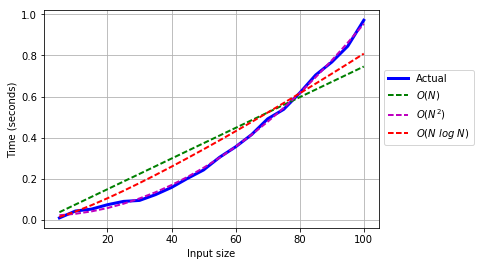

In [34]:
# Actual performance
actual_anagram1_x = sorted(performance_dict_anagram1.keys())
actual_anagram1_y = sorted(performance_dict_anagram1.values())

# Theoretical predictions if O(N)
theoretical_anagram1_x = anagram1_word_sizes

# Perform curve-fitting assuming both a linear and a polynomial function
anagram1_linearN_params,anagram1_linearN_covariance = curve_fit(linearN,actual_anagram1_x,actual_anagram1_y,bounds=[0,[np.inf,np.inf]])
anagram1_N2_params,anagram1_N2_covariance = curve_fit(N2,actual_anagram1_x,actual_anagram1_y,bounds=[0,[np.inf,np.inf]])
anagram1_NlogN_params,anagram1_NlogN_covariance = curve_fit(NlogN,actual_anagram1_x,actual_anagram1_y,bounds=[0,[np.inf,np.inf]])

# Make different theoretical y-value predictions using parameters from curve-fitting
theoretical_anagram1_y_N = [linearN(num,anagram1_linearN_params[0],anagram1_linearN_params[1]) for num in theoretical_anagram1_x]
theoretical_anagram1_y_N2 = [N2(num,anagram1_N2_params[0],anagram1_N2_params[1]) for num in theoretical_anagram1_x]
theoretical_anagram1_y_NlogN = [NlogN(num,anagram1_NlogN_params[0],anagram1_NlogN_params[1]) for num in theoretical_anagram1_x]

# Setup the empty plot
f,ax = plt.subplots(1,1,sharex=True)
#ax.set_xscale('log')
#ax.set_yscale('log')
ax.set_xlabel('Input size')
ax.set_ylabel('Time (seconds)')
ax.grid(True)

ax.plot(actual_anagram1_x,actual_anagram1_y,color='b',lw=3,label='Actual')
ax.plot(theoretical_anagram1_x,theoretical_anagram1_y_N,color='g',lw=2,ls='--',label='$O(N)$')
ax.plot(theoretical_anagram1_x,theoretical_anagram1_y_N2,color='m',lw=2,ls='--',label='$O(N^2)$')
ax.plot(theoretical_anagram1_x,theoretical_anagram1_y_NlogN,color='r',lw=2,ls='--',label='$O(N\ log\ N)$')

ax.legend(loc='upper left',bbox_to_anchor=(1,.75))

### Example of $O(N\ log\ N)$ solution

Another strategy we could adopt is to sort the letters alphabetically and check if they're all there in both. This might save us from doing those loops. We'll use a specific sorting algorithm called `mergesort` that has $O(N\ log\ N)$ performance.

In [15]:
def anagram2(s1,s2):
    # Sort all the letters in s1 and s2 alphabetically
    sorted_s1 = mergesort(list(s1))
    sorted_s2 = mergesort(list(s2))
    # Assume we're in an anagram
    is_anagram = True
    
    # Loop through each position in the equal-sized sorted lists
    for pos in range(len(s1)):
        
        # Check if the alphabetically-sorted letters are the same in each positions
        if sorted_s1[pos] != sorted_s2[pos]:
            
            # Only if they're not do we change is_anagram
            is_anagram = False
            # Stop looping once you find evidence of non-anagram
            break
            
    # Return whatever the state of our anagrams is
    return is_anagram

In [16]:
# Test to make sure it works
print(anagram2('heart','earth'))
print(anagram2('boat','rock'))
print(anagram2('off','foo'))
print(anagram2('interrogatives','reinvestigator'))
print(anagram2('conversationalists','conservationalists'))

True
False
False
True
True


Test out the performance of this function with different word sizes, as we did above.

In [17]:
# Create a dictionary to store the performance numbers values for different inputs ranges as key
performance_dict_anagram2 = {}

anagram2_word_sizes = [5,10,100,1000,10000]

for word_size in anagram2_word_sizes:
    seconds = timeit.timeit(stmt='anagram2(random_word,shuffled_word)',
                            setup='random_word = make_a_random_word({0});shuffled_word = shuffle_a_word(random_word)'.format(word_size),
                            number=1000,
                            globals=globals())
    
    # Record the performance in the dictionary
    performance_dict_anagram2[word_size] = seconds
    
performance_dict_anagram2

{5: 0.0031213459951686673,
 10: 0.00557424300495768,
 100: 0.27845097899989923,
 1000: 4.395432744000573,
 10000: 71.124220745005}

Plot the performance of the algorithm with different input sizes and then find the best fits for different complexity classes. The factorial $O(N\ log\ N)$ curve in red is clearly the best to the actual data, which confirms our theoretical expectations.

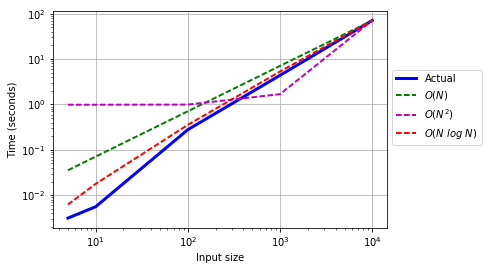

In [18]:
# Actual performance
actual_anagram2_x = sorted(performance_dict_anagram2.keys())
actual_anagram2_y = sorted(performance_dict_anagram2.values())

# Theoretical predictions if O(N)
theoretical_anagram2_x = anagram2_word_sizes

# Perform curve-fitting assuming both a linear and a polynomial function
anagram2_linearN_params,anagram2_linearN_covariance = curve_fit(linearN,actual_anagram2_x,actual_anagram2_y,bounds=[0,[np.inf,np.inf]])
anagram2_N2_params,anagram2_N2_covariance = curve_fit(N2,actual_anagram2_x,actual_anagram2_y,bounds=[0,[np.inf,np.inf]])
anagram2_NlogN_params,anagram2_NlogN_covariance = curve_fit(NlogN,actual_anagram2_x,actual_anagram2_y,bounds=[0,[np.inf,np.inf]])

# Make different theoretical y-value predictions using parameters from curve-fitting
theoretical_anagram2_y_N = [linearN(num,anagram2_linearN_params[0],anagram2_linearN_params[1]) for num in theoretical_anagram2_x]
theoretical_anagram2_y_N2 = [N2(num,anagram2_N2_params[0],anagram2_N2_params[1]) for num in theoretical_anagram2_x]
theoretical_anagram2_y_NlogN = [NlogN(num,anagram2_NlogN_params[0],anagram2_NlogN_params[1]) for num in theoretical_anagram2_x]

# Setup the empty plot
f,ax = plt.subplots(1,1,sharex=True)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Input size')
ax.set_ylabel('Time (seconds)')
ax.grid(True)

ax.plot(actual_anagram2_x,actual_anagram2_y,color='b',lw=3,label='Actual')
ax.plot(theoretical_anagram2_x,theoretical_anagram2_y_N,color='g',lw=2,ls='--',label='$O(N)$')
ax.plot(theoretical_anagram2_x,theoretical_anagram2_y_N2,color='m',lw=2,ls='--',label='$O(N^2)$')
ax.plot(theoretical_anagram2_x,theoretical_anagram2_y_NlogN,color='r',lw=2,ls='--',label='$O(N\ log\ N)$')

ax.legend(loc='upper left',bbox_to_anchor=(1,.75))

The function `anagram2` replaces the double loop with a single loop, so we avoid the worst-case scenario of $O(N^2)$ and hopefully get $O(N)$. But as we'll learn in a few weeks, those sorting algorithms carry a cost of $O(N^2)$ in the worst case and $O(N~log~N)$ in the best case. Because $O(N~log~N)$ (from the sorting algorithms) dominates $O(N)$ (from the loop), this function only gets us to $O(N~log~N)$ in the best case, which is still an improvement from $O(N^2)$!

### Example of $O(N!)$ solution
Let's try a "brute force" solution where we generate a list of all possible strings from s1 and t hen see if s2 occurs. This is also the "thousands of monkeys on thousands of typewriters" approach to producing Shakespeare.

In [19]:
# See how the word "code" has 24 permutations of its 4 letters
list(permutations('code',4))

[('c', 'o', 'd', 'e'),
 ('c', 'o', 'e', 'd'),
 ('c', 'd', 'o', 'e'),
 ('c', 'd', 'e', 'o'),
 ('c', 'e', 'o', 'd'),
 ('c', 'e', 'd', 'o'),
 ('o', 'c', 'd', 'e'),
 ('o', 'c', 'e', 'd'),
 ('o', 'd', 'c', 'e'),
 ('o', 'd', 'e', 'c'),
 ('o', 'e', 'c', 'd'),
 ('o', 'e', 'd', 'c'),
 ('d', 'c', 'o', 'e'),
 ('d', 'c', 'e', 'o'),
 ('d', 'o', 'c', 'e'),
 ('d', 'o', 'e', 'c'),
 ('d', 'e', 'c', 'o'),
 ('d', 'e', 'o', 'c'),
 ('e', 'c', 'o', 'd'),
 ('e', 'c', 'd', 'o'),
 ('e', 'o', 'c', 'd'),
 ('e', 'o', 'd', 'c'),
 ('e', 'd', 'c', 'o'),
 ('e', 'd', 'o', 'c')]

We can "stringify" each of these permutation tuples by converting them back into a string by joining each element by nothing. Here's one example.

In [20]:
''.join(('d', 'e', 'c', 'o'))

'deco'

These kinds of combinatorics (a string of length 4 generating 24 unique permutations!) are where the expensive factorials come in! Longer words would need to go through a lot of possible permutations!

In [21]:
def anagram3(s1,s2):
    # Assume we don't have any anagrams
    is_anagram = False
    # Loop through every permutation of the string that is the same size as the string
    for permutation in permutations(s1,len(s1)):
        
        # The permutation returns a list of strings, "stringify" it back to a string
        stringified = ''.join(permutation)
        # If we find a permutation of s1 that is the same as s2, then it's an anagram
        if stringified == s2:
            is_anagram = True
            
    # Return whether we found an anagram 
    return is_anagram

In [22]:
# Test to make sure it works
print(anagram3('heart','earth'))
print(anagram3('boat','rock'))
print(anagram3('off','foo'))

# You *really* don't want to test these out by uncommenting them
#print(anagram3('interrogatives','reinvestigator'))
#print(anagram3('conversationalists','conservationalists'))

True
False
False


Test the performance of this algorithm over a *very* narrow band of values to avoid the huge performance costs later on.

In [23]:
# Create a dictionary to store the performance numbers values for different inputs ranges as key
performance_dict_anagram3 = {}

anagram3_word_sizes = range(2,10)

for word_size in anagram3_word_sizes:
    seconds = timeit.timeit(stmt='anagram3(random_word,shuffled_word)',
                            setup='random_word = make_a_random_word({0});shuffled_word = shuffle_a_word(random_word)'.format(word_size),
                            number=1000,
                            globals=globals())
    
    # Record the performance in the dictionary
    performance_dict_anagram3[word_size] = seconds
    
performance_dict_anagram3

{2: 0.002323977998457849,
 3: 0.007480223001039121,
 4: 0.01224591200298164,
 5: 0.08560829499765532,
 6: 0.16441191799822263,
 7: 1.1732698639971204,
 8: 10.085875317003229,
 9: 95.1611363109987}

Plot the performance of the algorithm with different input sizes and then find the best fits for different complexity classes. The factorial $O(N!)$ curve in yellow is clearly the best to the actual data, which confirms our theoretical expectations.

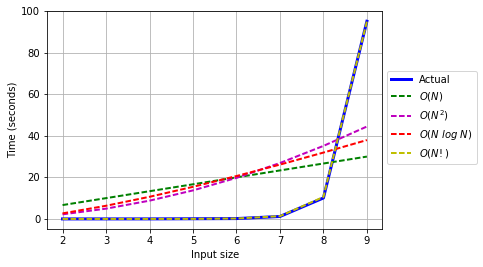

In [24]:
# Actual performance
actual_anagram3_x = sorted(performance_dict_anagram3.keys())
actual_anagram3_y = sorted(performance_dict_anagram3.values())

# Theoretical predictions if O(N)
theoretical_anagram3_x = anagram3_word_sizes

# Perform curve-fitting assuming both a linear and a polynomial function
anagram3_linearN_params,anagram3_linearN_covariance = curve_fit(linearN,actual_anagram3_x,actual_anagram3_y,bounds=[0,[np.inf,np.inf]])
anagram3_N2_params,anagram3_N2_covariance = curve_fit(N2,actual_anagram3_x,actual_anagram3_y,bounds=[0,[np.inf,np.inf]])
anagram3_NlogN_params,anagram3_NlogN_covariance = curve_fit(NlogN,actual_anagram3_x,actual_anagram3_y,bounds=[0,[np.inf,np.inf]])
anagram3_factN_params,anagram3_factN_covariance = curve_fit(factN,actual_anagram3_x,actual_anagram3_y,bounds=[0,[np.inf,np.inf]])

# Make different theoretical y-value predictions using parameters from curve-fitting
theoretical_anagram3_y_N = [linearN(num,anagram3_linearN_params[0],anagram3_linearN_params[1]) for num in theoretical_anagram3_x]
theoretical_anagram3_y_N2 = [N2(num,anagram3_N2_params[0],anagram3_N2_params[1]) for num in theoretical_anagram3_x]
theoretical_anagram3_y_NlogN = [NlogN(num,anagram3_NlogN_params[0],anagram3_NlogN_params[1]) for num in theoretical_anagram3_x]
theoretical_anagram3_y_factN = [factN(num,anagram3_factN_params[0],anagram3_factN_params[1]) for num in theoretical_anagram3_x]

# Setup the empty plot
f,ax = plt.subplots(1,1,sharex=True)
#ax.set_xscale('log')
#ax.set_yscale('log')
ax.set_xlabel('Input size')
ax.set_ylabel('Time (seconds)')
ax.grid(True)

ax.plot(actual_anagram3_x,actual_anagram3_y,color='b',lw=3,label='Actual')
ax.plot(theoretical_anagram3_x,theoretical_anagram3_y_N,color='g',lw=2,ls='--',label='$O(N)$')
ax.plot(theoretical_anagram3_x,theoretical_anagram3_y_N2,color='m',lw=2,ls='--',label='$O(N^2)$')
ax.plot(theoretical_anagram3_x,theoretical_anagram3_y_NlogN,color='r',lw=2,ls='--',label='$O(N\ log\ N)$')
ax.plot(theoretical_anagram3_x,theoretical_anagram3_y_factN,color='y',lw=2,ls='--',label='$O(N!)$')

ax.legend(loc='upper left',bbox_to_anchor=(1,.75))

### Example of $O(N)$ solution
We can actually make this an $O(N)$ problem if we're really clever. The `ord` function returns an integer "code point" for where the character appears, almost like a dictionary where the key is a letter and the value is its position in a really big alphabet. If we subtract it from where A appears, then we know the "letter distance" are between the letter and A.

In [25]:
print(ord('a'), ord('b'), ord('y'), ord('z'))

# A is the 1st letter starting at A
print(ord('a') - ord('a'))

97 98 121 122
0


In [26]:
def anagram4(s1,s2):
    # Create two storage containers that will count how often a letter appears
    code_s1 = [0]*26
    code_s2 = [0]*26
    
    # Loop through each letter in s1
    for s1_letter in s1:
        # Count how many letter away this letter is from A
        ord_s1 = ord(s1_letter) - ord('a')
        # Increment the storage container at the location of the letter by 1
        code_s1[ord_s1] += 1
    
    # Do the same for s2
    for s2_letter in s2:
        ord_s2 = ord(s2_letter) - ord('a')
        code_s2[ord_s2] += 1
    
    # Check if the storage containers are the same
    if code_s1 == code_s2:
        return True
    else:
        return False

In [27]:
# Test to make sure it works
print(anagram4('heart','earth'))
print(anagram4('boat','rock'))
print(anagram4('off','foo'))
print(anagram4('interrogatives','reinvestigator'))
print(anagram4('conversationalists','conservationalists'))

True
False
False
True
True


If you don't like indexing with lists, you could also do a similar approach using dictionaries keyed by letter with values being the count of the number of letters. First we can create a dictionary of letters as keys with values as 0 by using the `zip` function.

In [28]:
dict(zip(string.ascii_lowercase,[0]*26))

{'a': 0,
 'b': 0,
 'c': 0,
 'd': 0,
 'e': 0,
 'f': 0,
 'g': 0,
 'h': 0,
 'i': 0,
 'j': 0,
 'k': 0,
 'l': 0,
 'm': 0,
 'n': 0,
 'o': 0,
 'p': 0,
 'q': 0,
 'r': 0,
 's': 0,
 't': 0,
 'u': 0,
 'v': 0,
 'w': 0,
 'x': 0,
 'y': 0,
 'z': 0}

In [29]:
def anagram4_1(s1,s2):
    # Create two storage containers that will count how often a letter appears
    code_s1 = dict(zip(string.ascii_lowercase,[0]*26))
    code_s2 = dict(zip(string.ascii_lowercase,[0]*26))
    
    # Loop through each letter in s1
    for s1_letter in s1:
        # Increment the storage container at the location of the letter by 1
        code_s1[s1_letter] += 1
    
    # Do the same for s2
    for s2_letter in s2:
        code_s2[s2_letter] += 1
    
    # Check if the storage containers are the same
    if code_s1 == code_s2:
        return True
    else:
        return False

In [30]:
# Test to make sure it works
print(anagram4_1('heart','earth'))
print(anagram4_1('boat','rock'))
print(anagram4_1('off','foo'))
print(anagram4_1('interrogatives','reinvestigator'))
print(anagram4_1('conversationalists','conservationalists'))

True
False
False
True
True


Test the performance of this theoretically linear algorithm over several orders of magnitude of input values to confirm this is a $O(N)$ rather than $O(N\ log\ N)$ algorithm.

In [31]:
# Create a dictionary to store the performance numbers values for different inputs ranges as key
performance_dict_anagram4 = {}

anagram4_word_sizes = [5,10,100,1000,10000,100000]

for word_size in anagram4_word_sizes:
    seconds = timeit.timeit(stmt='anagram4(random_word,shuffled_word)',
                            setup='random_word = make_a_random_word({0});shuffled_word = shuffle_a_word(random_word)'.format(word_size),
                            number=1000,
                            globals=globals())
    
    # Record the performance in the dictionary
    performance_dict_anagram4[word_size] = seconds
    
performance_dict_anagram4

{5: 0.003979572000389453,
 10: 0.010852870997041464,
 100: 0.13476502100093057,
 1000: 0.3646413459937321,
 10000: 3.664329852996161,
 100000: 39.65033461400162}

Plot the performance of the algorithm with different input sizes and then find the best fits for different complexity classes. The linear $O(N)$ curve in green is clearly the best to the actual data, which confirms our theoretical expectations.

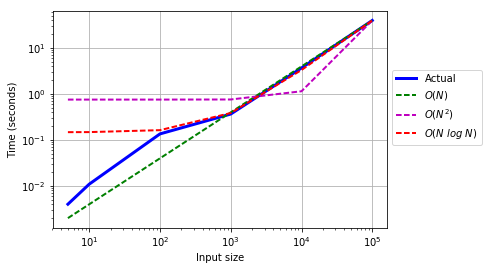

In [32]:
# Actual performance
actual_anagram4_x = sorted(performance_dict_anagram4.keys())
actual_anagram4_y = sorted(performance_dict_anagram4.values())

# Theoretical predictions if O(N)
theoretical_anagram4_x = anagram4_word_sizes

# Perform curve-fitting assuming both a linear and a polynomial function
anagram4_linearN_params,anagram4_linearN_covariance = curve_fit(linearN,actual_anagram4_x,actual_anagram4_y,bounds=[0,[np.inf,np.inf]])
anagram4_N2_params,anagram4_N2_covariance = curve_fit(N2,actual_anagram4_x,actual_anagram4_y,bounds=[0,[np.inf,np.inf]])
anagram4_NlogN_params,anagram4_NlogN_covariance = curve_fit(NlogN,actual_anagram4_x,actual_anagram4_y,bounds=[0,[np.inf,np.inf]])

# Make different theoretical y-value predictions using parameters from curve-fitting
theoretical_anagram4_y_N = [linearN(num,anagram4_linearN_params[0],anagram4_linearN_params[1]) for num in theoretical_anagram4_x]
theoretical_anagram4_y_N2 = [N2(num,anagram4_N2_params[0],anagram4_N2_params[1]) for num in theoretical_anagram4_x]
theoretical_anagram4_y_NlogN = [NlogN(num,anagram4_NlogN_params[0],anagram4_NlogN_params[1]) for num in theoretical_anagram4_x]

# Setup the empty plot
f,ax = plt.subplots(1,1,sharex=True)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Input size')
ax.set_ylabel('Time (seconds)')
ax.grid(True)

ax.plot(actual_anagram4_x,actual_anagram4_y,color='b',lw=3,label='Actual')
ax.plot(theoretical_anagram4_x,theoretical_anagram4_y_N,color='g',lw=2,ls='--',label='$O(N)$')
ax.plot(theoretical_anagram4_x,theoretical_anagram4_y_N2,color='m',lw=2,ls='--',label='$O(N^2)$')
ax.plot(theoretical_anagram4_x,theoretical_anagram4_y_NlogN,color='r',lw=2,ls='--',label='$O(N\ log\ N)$')

ax.legend(loc='upper left',bbox_to_anchor=(1,.75))